In [351]:
import yfinance as yF
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
import os

In [352]:
stock_list = ['QQQ']
print('stock_list:', stock_list)

stock_list: ['QQQ']


In [353]:
data = yF.download(stock_list, start="2000-01-01", end="2022-06-18")

[*********************100%***********************]  1 of 1 completed


In [354]:
data.drop(['Adj Close','Volume'], axis=1, inplace=True)

In [355]:
data.columns = data.columns.map(''.join).str.strip('')

In [356]:
day = np.arange(1, len(data) +1)
data['Day'] = day

In [357]:
stock = data[['Day', 'Open', 'High', 'Low', 'Close']]

In [358]:
stock

,Day,Open,High,Low,Close
Date,,,,,
2000-01-03,1,96.187500,96.187500,90.750000,94.750000
2000-01-04,2,92.000000,93.500000,87.937500,88.250000
2000-01-05,3,87.500000,89.625000,84.250000,86.000000
2000-01-06,4,86.875000,88.000000,79.750000,80.093750
2000-01-07,5,82.937500,90.000000,82.500000,90.000000
...,...,...,...,...,...
2022-06-13,5648,279.750000,282.339996,274.529999,275.410004
2022-06-14,5649,277.660004,278.660004,273.339996,275.910004
2022-06-15,5650,279.420013,286.829987,276.609985,282.799988


In [359]:
#---

In [360]:
# 210 Day Simple Moving Average
stock['210-SMA'] = stock['Close'].rolling(210).mean().shift()

/var/folders/16/8x8wb81s5fn9sg2p8fxy766m0000gn/T/ipykernel_782/4166232773.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock['210-SMA'] = stock['Close'].rolling(210).mean().shift()


In [361]:
stock['Signal'] = np.where(stock['210-SMA'] > stock['Close'], 1, 0)

/var/folders/16/8x8wb81s5fn9sg2p8fxy766m0000gn/T/ipykernel_782/2724478229.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock['Signal'] = np.where(stock['210-SMA'] > stock['Close'], 1, 0)


In [362]:
port = stock

In [363]:
port

,Day,Open,High,Low,Close,210-SMA,Signal
Date,,,,,,,
2000-01-03,1,96.187500,96.187500,90.750000,94.750000,NaN,0
2000-01-04,2,92.000000,93.500000,87.937500,88.250000,NaN,0
2000-01-05,3,87.500000,89.625000,84.250000,86.000000,NaN,0
2000-01-06,4,86.875000,88.000000,79.750000,80.093750,NaN,0
2000-01-07,5,82.937500,90.000000,82.500000,90.000000,NaN,0
...,...,...,...,...,...,...,...
2022-06-13,5648,279.750000,282.339996,274.529999,275.410004,358.761381,1
2022-06-14,5649,277.660004,278.660004,273.339996,275.910004,358.322715,1
2022-06-15,5650,279.420013,286.829987,276.609985,282.799988,357.880286,1


In [364]:
port.loc[(port['Close'] < port['210-SMA']), 'Close'] = 'NaN'

/Users/monicaclairew/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [365]:
port

,Day,Open,High,Low,Close,210-SMA,Signal
Date,,,,,,,
2000-01-03,1,96.187500,96.187500,90.750000,94.75,NaN,0
2000-01-04,2,92.000000,93.500000,87.937500,88.25,NaN,0
2000-01-05,3,87.500000,89.625000,84.250000,86.0,NaN,0
2000-01-06,4,86.875000,88.000000,79.750000,80.09375,NaN,0
2000-01-07,5,82.937500,90.000000,82.500000,90.0,NaN,0
...,...,...,...,...,...,...,...
2022-06-13,5648,279.750000,282.339996,274.529999,NaN,358.761381,1
2022-06-14,5649,277.660004,278.660004,273.339996,NaN,358.322715,1
2022-06-15,5650,279.420013,286.829987,276.609985,NaN,357.880286,1


In [366]:
#Chart asset & 10month SMA

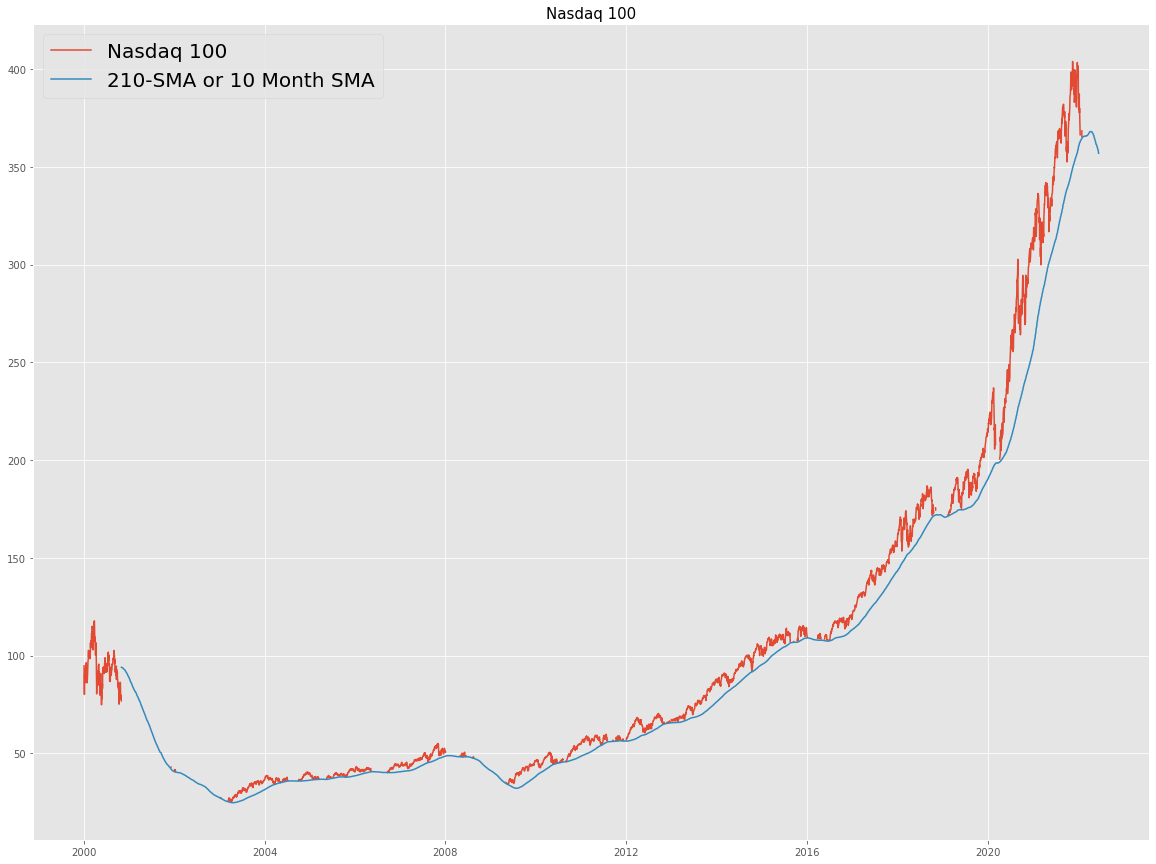

In [367]:
plt.figure(figsize = (20,15))
plt.plot(stock['Close'], label = 'Nasdaq 100')
plt.plot(stock['210-SMA'], label = '210-SMA or 10 Month SMA')
plt.title('Nasdaq 100', size=15)
plt.legend(prop={'size': 20})
plt.savefig('Nasdaq_Owned.jpg')